In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Source Sans Pro']})#, 'size': 10})
gray_ax = '#999999'
anisotropic_color = '#AA6699'
isotropic_color = '#CCFFBB'

### Load in semi-analyzed data from the groupshare

In [3]:
basedir = './disassembly/packaging_sites/'
basedir = '/Volumes/manoharan_lab/apaine/Code/disassembly/packaging_sites/'
batches = ['0_PS_off',
           '1_PS_off', 
           '2_PS_off',
           '3_PS_off',
           '5_PS_off',
           '6_PS_off',
           '7_PS_off',
           '8_PS_off',
           '9_PS_off',
          ]

In [4]:
deb = ['0.05', '0.1', '0.15', '0.2', '0.25']
att = ['1.6', '1.8', '2.0', '2.2', '2.4', '2.6']
pss = ['10']
repeats = 30

In [5]:
# Read in data from "raw" files
def read_pairs(f):
    text_pairs = np.loadtxt(f, dtype='str', delimiter='\n')
    list_pairs = [[pair.split('|') for pair in line.strip().split(' ')] for line in text_pairs]
    return list_pairs

data = dict.fromkeys(batches, {})

for batch in batches:
    print(batch)
    data[batch] = {
        'adsorbed': {},
        'bonds': {},
        'cluster': {},
        'pairs': {}
    }
    for d in deb:
        data[batch]['adsorbed'][d] = {}
        data[batch]['bonds'][d] = {}
        data[batch]['cluster'][d] = {}
        data[batch]['pairs'][d] = {}
        for a in att:
            data[batch]['adsorbed'][d][a] = []
            data[batch]['bonds'][d][a] = []
            data[batch]['cluster'][d][a] = []
            data[batch]['pairs'][d][a] = []
            print(d, a)
            for i in range(repeats):
                data[batch]['adsorbed'][d][a].append(
                    np.loadtxt(basedir + batch + '/analysis/raw/adsorbed_DEB-%s_ATT-%s_PSS-%s_%s.txt' % (d, a, pss[0], str(i))))
                data[batch]['bonds'][d][a].append(
                    np.loadtxt(basedir + batch + '/analysis/raw/bonds_DEB-%s_ATT-%s_PSS-%s_%s.txt' % (d, a, pss[0], str(i))))
                data[batch]['cluster'][d][a].append(
                    np.loadtxt(basedir + batch + '/analysis/raw/cluster_DEB-%s_ATT-%s_PSS-%s_%s.txt' % (d, a, pss[0], str(i))))
                data[batch]['pairs'][d][a].append(
                    read_pairs(basedir + batch + '/analysis/raw/pairs_DEB-%s_ATT-%s_PSS-%s_%s.txt' % (d, a, pss[0], str(i))))

0_PS_off
0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.2 2.4
0.2 2.6
0.25 1.6
0.25 1.8
0.25 2.0
0.25 2.2
0.25 2.4
0.25 2.6
1_PS_off
0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.2 2.4
0.2 2.6
0.25 1.6
0.25 1.8
0.25 2.0
0.25 2.2
0.25 2.4
0.25 2.6
2_PS_off
0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.2 2.4
0.2 2.6
0.25 1.6
0.25 1.8
0.25 2.0
0.25 2.2
0.25 2.4
0.25 2.6
3_PS_off
0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.

In [6]:
x_scale = np.loadtxt(basedir + batches[0] + '/analysis/xscale/xscale.txt')

### Plot individual simulation trajectories (bonds and adsorbed)

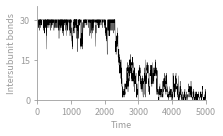

In [7]:
ax = plt.figure(figsize=(3.2, 2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)

plt.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.4'][8], c='k', lw=0.3)
plt.xlim(0, 5000)
plt.ylim(0, 35)
plt.xlabel('Time', color=gray_ax)
plt.ylabel('Intersubunit bonds', color=gray_ax)
#ax.yaxis.set_label_coords(0, 1.05)
ax.yaxis.set_ticks([0, 15, 30])
plt.tight_layout()
plt.savefig('paper_plots/nucleation/single_trace_1col.pdf')

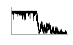

In [121]:
ax = plt.figure(figsize=(1, 0.5)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)

plt.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.4'][8], c='k', lw=0.3)
plt.xlim(0, 5000)
plt.ylim(0, 35)
ax.yaxis.set_label_coords(0, 1.05)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
#plt.tight_layout()
plt.savefig('paper_plots/nucleation/single_trace_mini.pdf')

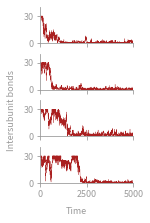

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [7, 13, 4, 19]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.2'][trace_indices[i]], lw=0.3, c='#AA2020')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/nucleation/multi_trace_2.2kT.pdf')

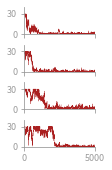

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(1.5, 2.3))
trace_indices = [7, 13, 4, 19]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.2'][trace_indices[i]], lw=0.3, c='#AA2020')

plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/nucleation/multi_trace_2.2kT_1col.pdf')

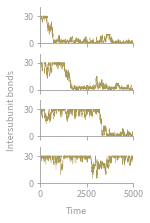

In [81]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [5, 11, 24, 27]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.4'][trace_indices[i]], lw=0.3, c='#AA9955')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/nucleation/multi_trace_2.4kT.pdf')

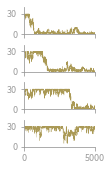

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(1.5, 2.3))
trace_indices = [5, 11, 24, 27]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.4'][trace_indices[i]], lw=0.3, c='#AA9955')

plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/nucleation/multi_trace_2.4kT_1col.pdf')

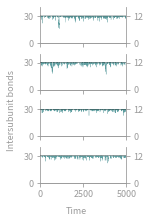

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [7, 13, 4, 19]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.15']['2.6'][trace_indices[i]], lw=0.3, c='cadetblue')
    ax2 = ax.twinx()
    ax2.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color(gray_ax)
    ax2.spines['right'].set_color(gray_ax)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0, 16)
    ax2.yaxis.set_ticks([0, 12])
    ax2.plot(x_scale, data['1_PS_off']['adsorbed']['0.15']['2.6'][trace_indices[i]], lw=0.3, c='k')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/supplemental/example_traces_no_disassembly.pdf')

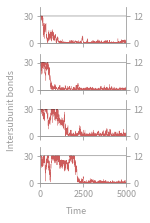

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [7, 13, 4, 19]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.2']['2.2'][trace_indices[i]], lw=0.3, c='indianred')
    ax2 = ax.twinx()
    ax2.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color(gray_ax)
    ax2.spines['right'].set_color(gray_ax)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0, 16)
    ax2.yaxis.set_ticks([0, 12])
    ax2.plot(x_scale, data['1_PS_off']['adsorbed']['0.2']['2.2'][trace_indices[i]], lw=0.3, c='k')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/supplemental/example_traces_disordered_subunits.pdf')

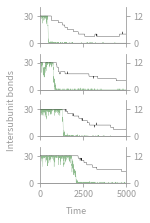

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [7, 4, 19, 13]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.1']['2.6'][trace_indices[i]], lw=0.3, c='darkseagreen')
    ax2 = ax.twinx()
    ax2.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color(gray_ax)
    ax2.spines['right'].set_color(gray_ax)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0, 16)
    ax2.yaxis.set_ticks([0, 12])
    ax2.plot(x_scale, data['1_PS_off']['adsorbed']['0.1']['2.6'][trace_indices[i]], lw=0.3, c='k')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/supplemental/example_traces_slow_subunit_detachment.pdf')

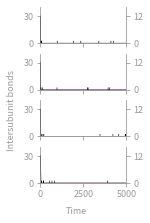

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(2, 3))
trace_indices = [7, 13, 4, 19]
for i in range(len(axs)):
    ax = axs[i]
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 40)
    ax.yaxis.set_ticks([0, 30])
    ax.xaxis.set_ticks([0, 2500, 5000])
    ax.plot(x_scale, data['1_PS_off']['bonds']['0.05']['2.6'][trace_indices[i]], lw=0.3, c='purple')
    ax2 = ax.twinx()
    ax2.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color(gray_ax)
    ax2.spines['right'].set_color(gray_ax)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0, 16)
    ax2.yaxis.set_ticks([0, 12])
    ax2.plot(x_scale, data['1_PS_off']['adsorbed']['0.05']['2.6'][trace_indices[i]], lw=0.3, c='k')

fig.supylabel('Intersubunit bonds', color=gray_ax, fontsize=10)
fig.supxlabel('Time', color=gray_ax, fontsize=10)
plt.tight_layout(pad=0.5)
plt.savefig('paper_plots/supplemental/example_traces_rapid_subunit_detachment.pdf')

### Make phase diagram of disassembly intermediates & end states

In [20]:
# Get disassembly intermediates / end state
# 1. no disassembly
# 2. all subunits attached but disordered
# 3. disordered state followed by detachment of subunits
# 4. subunits begin to detaach before full disordered state forms

def get_pathway(data, d, a, repeat):
    bonds_trajectory = data['bonds'][d][a][repeat]
    subunit_trajectory = data['adsorbed'][d][a][repeat]
    if subunit_trajectory[-1] == 12:  # all subunits attached
        if bonds_trajectory[-1] > 20:
            return 1
        else:
            return 2
    else:
        bonds_cutoff = np.array(bonds_trajectory) <= 5
        adsorbed_at_disassembly = subunit_trajectory[np.where(bonds_cutoff == True)[0][0]]
        if adsorbed_at_disassembly == 12:
            return 3
        else:
            return 4

In [21]:
pathway1 = np.zeros((len(deb), len(att)))
pathway2 = np.zeros((len(deb), len(att)))
pathway3 = np.zeros((len(deb), len(att)))
pathway4 = np.zeros((len(deb), len(att)))

for batch in batches:
    for d in range(len(deb)):
        for a in range(len(att)):
            for i in range(repeats):
                pathway = get_pathway(data[batch], deb[d], att[a], i)
                if pathway == 1:
                    pathway1[d][a] += 1
                if pathway == 2:
                    pathway2[d][a] += 1
                if pathway == 3:
                    pathway3[d][a] += 1
                if pathway == 4:
                    pathway4[d][a] += 1

totals = pathway1 + pathway2 + pathway3 + pathway4

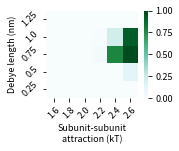

In [22]:
# Heatmaps of individual pathways
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(pathway1[::-1] / totals, cmap='BuGn', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/supplemental/phase_diagram_pathway1.pdf')
plt.show()

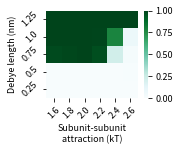

In [23]:
# Heatmaps of individual pathways
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(pathway2[::-1] / totals, cmap='BuGn', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/supplemental/phase_diagram_pathway2.pdf')
plt.show()

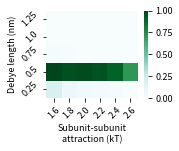

In [24]:
# Heatmaps of individual pathways
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(pathway3[::-1] / totals, cmap='BuGn', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/supplemental/phase_diagram_pathway3.pdf')
plt.show()

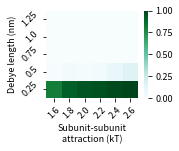

In [25]:
# Heatmaps of individual pathways
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(pathway4[::-1] / totals, cmap='BuGn', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/supplemental/phase_diagram_pathway4.pdf')
plt.show()

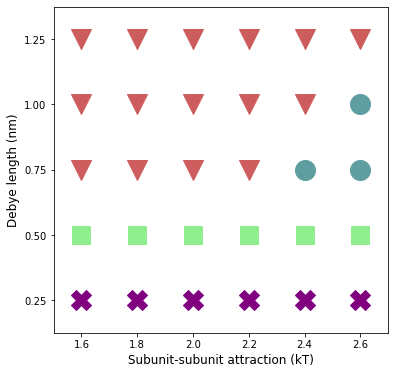

In [23]:
# Phase diagram of most common pathway

ax = plt.figure(figsize=(6, 6)).gca()
plt.xlim(1.5, 2.7)
plt.ylim(0.125, 1.375)
plt.yticks(ticks=[0.25, 0.50, 0.75, 1.0, 1.25])
plt.xlabel('Subunit-subunit attraction (kT)', fontsize='large')
plt.ylabel('Debye length (nm)', fontsize='large')
for d in range(len(deb)):
    for a in range(len(att)):
        pathways = [pathway1[d][a], pathway2[d][a], pathway3[d][a], pathway4[d][a]]
        most_common_pathway = pathways.index(max(pathways)) + 1
        if most_common_pathway == 1:
            plt.scatter([float(att[a])], [5 * float(deb[d])], s=400, marker='o', c='cadetblue')
        if most_common_pathway == 2:
            plt.scatter([float(att[a])], [5 * float(deb[d])], s=400, marker='v', c='indianred')
        if most_common_pathway == 3:
            plt.scatter([float(att[a])], [5 * float(deb[d])], s=300, marker='s', c='lightgreen')
        if most_common_pathway == 4:
            plt.scatter([float(att[a])], [5 * float(deb[d])], s=400, marker='X', c='purple')
plt.savefig(basedir + '/plots/phasediagram.pdf')

### Boxplots of disassembly nucleation time

In [8]:
def get_disassembly_times(data, x_scale, d, a):
    disassembly_times = []
    for bonds_trajectory in data['bonds'][d][a]:
        disassembly_index = len(bonds_trajectory) - list(reversed(bonds_trajectory)).index(30.) -  1
        disassembly_time = x_scale[disassembly_index]
        disassembly_times.append(disassembly_time)
    return disassembly_times

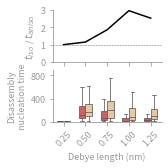

In [846]:
anisotropic_batches = ['0_PS_off', '3_PS_off', '6_PS_off', '5_PS_off']
isotropic_batches = ['1_PS_off', '2_PS_off', '7_PS_off', '8_PS_off', '9_PS_off']

boxplot_data_organizer = {
    'iso': [],
    'debye': [],
    'disassembly_time': []
}
# Comparing conditions that result in a similar disaassembly time
da_pairs = [('0.05', '2.6'), ('0.1', '2.4'), ('0.15', '2.0'), ('0.2', '2.0'), ('0.25', '2.6')]
for da in da_pairs:
    d = da[0]
    a = da[1]
    for batch in anisotropic_batches:
        disassembly_times = get_disassembly_times(data[batch], x_scale, d, a)
        boxplot_data_organizer['iso'].extend(['Anisotropic'] * len(disassembly_times))
        boxplot_data_organizer['debye'].extend([float(d)] * len(disassembly_times))
        boxplot_data_organizer['disassembly_time'].extend(disassembly_times)
    for batch in isotropic_batches:
        disassembly_times = get_disassembly_times(data[batch], x_scale, d, a)
        boxplot_data_organizer['iso'].extend(['Isotropic'] * len(disassembly_times))
        boxplot_data_organizer['debye'].extend([float(d)] * len(disassembly_times))
        boxplot_data_organizer['disassembly_time'].extend(disassembly_times)

anisotropic_times = []
isotropic_times = []

for da in da_pairs:
    d = da[0]
    a = da[1]
    anisotropic_times.append([])
    isotropic_times.append([])
    for batch in anisotropic_batches:
        anisotropic_times[-1].extend(get_disassembly_times(data[batch], x_scale, d, a))
    for batch in isotropic_batches:
        isotropic_times[-1].extend(get_disassembly_times(data[batch], x_scale, d, a))

anisotropic_means = np.mean(np.array(anisotropic_times), axis=1)
isotropic_means = np.mean(np.array(isotropic_times), axis=1)        

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(2.2, 2.2))

axs[0].plot(isotropic_means / anisotropic_means, c='k')

pal = {"Anisotropic": "#DD5050", "Isotropic": "#EECC99"}
sns.boxplot(x="debye", y="disassembly_time", hue="iso", 
            data=pd.DataFrame(boxplot_data_organizer), linewidth=0.75, 
            width=0.6, palette=pal, showfliers=False, ax=axs[1])

for ax in axs:
    gray_ax = '#999999'
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    
axs[0].axhline(1, linestyle='--', lw=0.5, c='#666666')
axs[0].set_ylim(0, 3)
axs[0].set_ylabel(r'$t_{iso}$ / $t_{aniso}$', color=gray_ax)
axs[0].set_yticks([0, 1, 2, 3])

axs[1].set_ylim(0, 900)
axs[1].set_xlabel('Debye length (nm)', color=gray_ax)
axs[1].set_ylabel('Disassembly\nnucleation time', color=gray_ax)
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_xticklabels(['0.25', '0.50', '0.75', '1.00', '1.25'], rotation=45)
axs[1].set_yticks([0, 400, 800])
plt.legend([],[], frameon=False)
plt.tight_layout(pad=0.2)
plt.savefig('paper_plots/anisotropy/boxplot_comparison2.pdf')

### Exponential fit to cumulative nucleation time

In [9]:
import scipy.optimize

In [10]:
def exponential(t, A, tau):
    return A * (1 - np.exp(-1 * t / tau))

def exponential_fixedA(t, tau):
    return 30 * (1 - np.exp(-1 * t / tau))

def two_exponential_fixedA(t, tau1, tau2, A1):
    return A1 * (1 - np.exp(-1 * t / tau1)) + (30 - A1) * (1 - np.exp(-1 * t / tau2))

In [12]:
for batch in batches:
    print(batch)
    for d in deb:
        for a in att:
            if not os.path.exists(basedir + batch + '/analysis/plots/cumulative'):
                os.mkdir(basedir + batch + '/analysis/plots/cumulative')
            try:
                ax = plt.figure(figsize=(6, 6)).gca()
                disassembly_times = get_disassembly_times(data[batch], x_scale, d, a)
                disassembly_times.sort()
                plt.scatter(disassembly_times, list(range(1, len(disassembly_times) + 1)), 
                            color='indianred', facecolors='none')
                exponential_fit = scipy.optimize.curve_fit(exponential_fixedA, 
                                                           np.array(disassembly_times),
                                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                                           p0=[10, 400, 15], bounds=([0, 0, 0], [np.inf, np.inf, 30]))
                fit_curve = two_exponential_fixedA(np.array(x_scale), 
                                                   exponential_fit[0][0], 
                                                   exponential_fit[0][1], 
                                                   exponential_fit[0][2])
                plt.plot(x_scale, fit_curve, color='cadetblue')
                plt.xlim(0, 5000)
                plt.xlabel('Disassembly start time', fontsize='x-large')
                plt.ylim(0, 32)
                plt.ylabel('Number of particles', fontsize='x-large')
                plt.text(3500, 2, str(np.round(exponential_fit[0])))
                plt.title('Cumulative disassembled particles\nDebye = %s, A-A = %s' % (d, a), fontsize='x-large')
                plt.savefig(basedir + batch + '/analysis/plots/cumulative/start_times_two_exp_DEB-%s_ATT-%s.pdf' % (d, a))
                plt.close()
            except RuntimeError:
                continue

0_PS_off
1_PS_off
2_PS_off
3_PS_off
5_PS_off
6_PS_off
7_PS_off
8_PS_off
9_PS_off


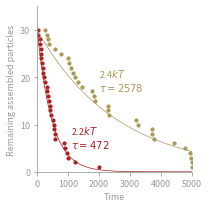

In [229]:
ax = plt.figure(figsize=(3, 3)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)

color = '#AA2020'
disassembly_times = get_disassembly_times(data['1_PS_off'], x_scale, '0.2', '2.2')
disassembly_times.sort()
#plt.scatter(disassembly_times, list(range(1, len(disassembly_times) + 1)), 
#            color=color, s=10)
exponential_fit = scipy.optimize.curve_fit(exponential_fixedA, 
                                           np.array(disassembly_times),
                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                           p0=[400])
fit_curve = exponential_fixedA(np.array(x_scale), exponential_fit[0][0])
#plt.plot(x_scale, fit_curve, color=color, lw=0.7)
plt.scatter(disassembly_times,  -1 * np.array(range(0, len(disassembly_times))) + 30, 
            color=color, s=10)
plt.plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)
plt.text(1100, 5, r'2.2$kT$' + '\n' + r'$\tau=472$', color=color)

color = '#AA9955'
disassembly_times = get_disassembly_times(data['1_PS_off'], x_scale, '0.2', '2.4')
disassembly_times.sort()
#plt.scatter(disassembly_times, list(range(1, len(disassembly_times) + 1)), 
#            color=color, s=10)
exponential_fit = scipy.optimize.curve_fit(exponential_fixedA, 
                                           np.array(disassembly_times),
                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                           p0=[400])
fit_curve = exponential_fixedA(np.array(x_scale), exponential_fit[0][0])
#plt.plot(x_scale, fit_curve, color=color, lw=0.7)

plt.scatter(disassembly_times,  -1 * np.array(range(0, len(disassembly_times))) + 30, 
            color=color, s=10)
plt.plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)
plt.text(2000, 17, r'2.4$kT$' + '\n' + r'$\tau=2578$', color=color)

plt.xlim(0, 5000)
plt.ylim(0, 35)
plt.xlabel('Time', color=gray_ax)
plt.ylabel('Remaining assembled particles', color=gray_ax)
ax.yaxis.set_ticks([0, 10, 20, 30])
plt.tight_layout()
plt.savefig('paper_plots/nucleation/cumulative_comparison.pdf')

467.6666666666667


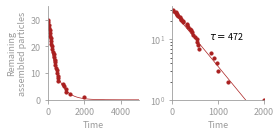

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 2))
gray_ax = '#999999'
for ax in axs:
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)

color = '#AA2020'
disassembly_times = get_disassembly_times(data['1_PS_off'], x_scale, '0.2', '2.2')
disassembly_times.sort()
print(np.mean(disassembly_times))

exponential_fit = scipy.optimize.curve_fit(exponential_fixedA, 
                                           np.array(disassembly_times),
                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                           p0=[400])
fit_curve = exponential_fixedA(np.array(x_scale), exponential_fit[0][0])

axs[0].scatter(disassembly_times,  -1 * np.array(range(0, len(disassembly_times))) + 30, 
               color=color, s=10)
axs[0].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)

axs[1].scatter(disassembly_times, -1 * np.array(range(0, len(disassembly_times))) + 30, 
               color=color, s=10)
axs[1].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)

axs[0].set_xlim(0, 5000)
axs[0].set_ylim(0, 35)
axs[0].set_xlabel('Time', color=gray_ax)
axs[0].set_ylabel('Remaining\nassembled particles', color=gray_ax)
axs[0].yaxis.set_ticks([0, 10, 20, 30])

axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1, 35)
axs[1].set_yscale('log')
axs[1].set_xlabel('Time', color=gray_ax)
axs[1].text(800, 10, r'$\tau = $' + str(int(np.round(exponential_fit[0][0]))))

plt.tight_layout()
plt.savefig('paper_plots/multi_nucleation/A_single_exponential.pdf')

228.46666666666667
(array([64.37649532]), array([[71.59929424]]))


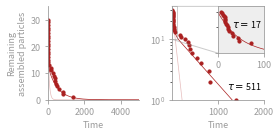

In [17]:
from matplotlib.ticker import NullFormatter

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 2))
gray_ax = '#999999'
for ax in axs:
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)

color = '#AA2020'
disassembly_times = get_disassembly_times(data['0_PS_off'], x_scale, '0.2', '2.2')
disassembly_times.sort()

print(np.mean(disassembly_times))

exponential_fit = scipy.optimize.curve_fit(exponential_fixedA, 
                                           np.array(disassembly_times),
                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                           p0=[400])
print(exponential_fit)
fit_curve = exponential_fixedA(np.array(x_scale), exponential_fit[0][0])
axs[0].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7, alpha=0.3)
axs[1].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7, alpha=0.3)

exponential_fit = scipy.optimize.curve_fit(two_exponential_fixedA, 
                                           np.array(disassembly_times),
                                           np.array(list(range(1, len(disassembly_times) + 1))),
                                           p0=[10, 400, 15], bounds=([0, 0, 0], [np.inf, np.inf, 30]))

fit_curve = two_exponential_fixedA(np.array(x_scale), 
                                   exponential_fit[0][0], 
                                   exponential_fit[0][1], 
                                   exponential_fit[0][2])
axs[0].scatter(disassembly_times,  -1 * np.array(range(0, len(disassembly_times))) + 30, 
               color=color, s=10)
axs[0].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)

axs[1].scatter(disassembly_times, -1 * np.array(range(0, len(disassembly_times))) + 30, 
               color=color, s=10)
axs[1].plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)

axs[0].set_xlim(0, 5000)
axs[0].set_ylim(0, 35)
axs[0].set_xlabel('Time', color=gray_ax)
axs[0].set_ylabel('Remaining\nassembled particles', color=gray_ax)
axs[0].yaxis.set_ticks([0, 10, 20, 30])

axs[1].set_xlim(1, 2000)
axs[1].set_ylim(1, 35)
axs[1].set_xlabel('Time', color=gray_ax)
axs[1].set_yscale('log')

# Make inset
axins = axs[1].inset_axes([0.5, 0.5, 0.5, 0.5])
axins.spines['top'].set_color(gray_ax)
axins.spines['right'].set_color(gray_ax)
axins.spines['bottom'].set_color(gray_ax)
axins.spines['left'].set_color(gray_ax)
axins.scatter(disassembly_times, -1 * np.array(range(0, len(disassembly_times))) + 30, 
               color=color, s=10)
axins.plot(x_scale, -1 * fit_curve + 30, color=color, lw=0.7)
# sub region of the original image
x1, x2, y1, y2 = 0, 100, 10, 35
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_yscale('log')
axins.set_facecolor('#eeeeee')
axins.tick_params(color=gray_ax, labelcolor=gray_ax)
axins.yaxis.set_major_formatter(NullFormatter())
axins.yaxis.set_minor_formatter(NullFormatter())

axins.text(30, 20, r'$\tau = $' + str(int(np.round(exponential_fit[0][2]))))
axs[1].text(1200, 1.5, r'$\tau = $' + str(int(np.round(exponential_fit[0][1]))))

ax.indicate_inset_zoom(axins, edgecolor=gray_ax)

plt.tight_layout()
#plt.savefig('paper_plots/multi_nucleation/B_double_exponential.pdf')
plt.show()

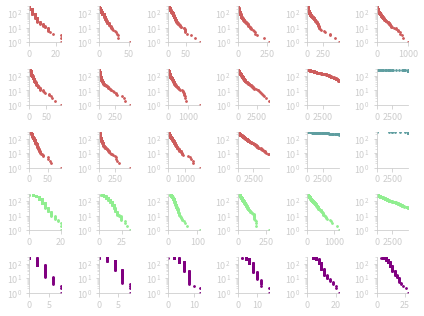

In [10]:
def exponential_decay_270(t, A, tau, b):
    return A * np.exp(-1 * t / tau) + b

fig, axs = plt.subplots(nrows=len(deb), ncols=len(att), figsize=(6, 4.5))
gray_ax = '#cccccc'

def get_color(d, a):
    if d=='0.15' and a=='2.4' or d=='0.15' and a=='2.6' or d=='0.2' and a=='2.6':
        return 'cadetblue'
    if d=='0.1':
        return 'lightgreen'
    if d=='0.05':
        return 'purple'
    return 'indianred'

for i in range(len(deb)):
    for j in range(len(att)):
        d = deb[::-1][i]
        a = att[j]
        ax = axs[i][j]
        ax.tick_params(color=gray_ax, labelcolor=gray_ax, which='both')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color(gray_ax)
        ax.spines['left'].set_color(gray_ax)
        disassembly_times = []
        for batch in batches:
            disassembly_times.extend(get_disassembly_times(data[batch], x_scale, d, a))
        disassembly_times.sort()
        disassembly_times = np.array(disassembly_times)[np.argwhere(np.array(disassembly_times) <= 4990)]
        ax.scatter(disassembly_times,  -1 * np.array(range(0, len(disassembly_times))) + 270, s=3, color=get_color(d, a))
        ax.set_xlim(0, np.max(disassembly_times))
        ax.set_ylim(1, 300)
        ax.set_yscale('log')
plt.tight_layout()
plt.savefig('paper_plots/supplemental/pathway_nucleation_2.pdf')

### Disassembly nucleation time heat maps

In [116]:
# Heatmap combining all datasets
all_disassembly_matrices = []
for batch in batches:
    disassembly_matrix = np.zeros((len(deb), len(att), repeats))
    for i in range(len(deb)):
        for j in range(len(att)):
            d = deb[i]
            a = att[j]
            disassembly_matrix[i][j] = get_disassembly_times(data[batch], x_scale, d, a)
    all_disassembly_matrices.append(disassembly_matrix)

structure_means = np.zeros((len(deb), len(att), len(batches)))
for i in range(len(deb)):
    for j in range(len(att)):
        structure_means[i][j] = [np.mean(m[i][j]) for m in all_disassembly_matrices]

combined_disassembly_matrix = np.concatenate(np.array(all_disassembly_matrices), axis=-1)

In [117]:
annot_mean = np.mean(combined_disassembly_matrix[::-1], axis=-1)
annot_std = np.std(combined_disassembly_matrix[::-1], axis=-1) / np.sqrt(len(batches) * repeats)
annotations = np.empty((len(deb), len(att)), dtype=object)
for i in range(len(deb)):
    for j in range(len(att)):
        if annot_mean[i][j] > 4000:
            annotations[i][j] = "N/A"
        elif annot_std[i][j] < 3:
            annotations[i][j] = "{:.1f}".format(annot_mean[i][j]) + "\n" + u"\u00B1" + "{:.1f}".format(annot_std[i][j])
        else:
            annotations[i][j] = "{:.0f}".format(annot_mean[i][j]) + "\n" + u"\u00B1" + "{:.0f}".format(annot_std[i][j])


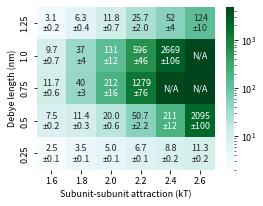

In [118]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

ax = plt.figure(figsize=(4, 3)).gca()
sns.heatmap(np.round(np.mean(combined_disassembly_matrix[::-1], axis=-1)), annot=annotations, fmt = '', cmap='BuGn', vmin=0, vmax=3000, norm=LogNorm())
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1])
plt.xlabel('Subunit-subunit attraction (kT)')
plt.ylabel('Debye length (nm)')
plt.savefig('paper_plots/disassembly_time/disassembly_heatmap.pdf')
plt.show()

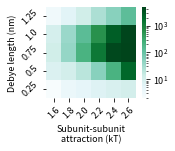

In [563]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(np.round(np.mean(combined_disassembly_matrix[::-1], axis=-1)), cmap='BuGn', vmin=0, vmax=3000, norm=LogNorm())
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/shift/disassembly_time_heatmap.pdf')
plt.show()

In [92]:
def get_disassembly_start_finish_times(data, x_scale, d, a):
    start_finish_times = []
    for bonds_trajectory in data['bonds'][d][a]:
        initiation_index = len(bonds_trajectory) - list(reversed(bonds_trajectory)).index(30.) -  1
        if 0 in bonds_trajectory:
            final_index = list(bonds_trajectory).index(0)
        else:
            continue
        if final_index > initiation_index and final_index < 2500:
            start_finish_time = x_scale[final_index] - x_scale[initiation_index]
            start_finish_times.append(start_finish_time)
    return start_finish_times

In [112]:
# Heatmap combining all datasets
all_disassembly_means = np.zeros((len(deb), len(att)))
all_disassembly_stds = np.zeros((len(deb), len(att)))
for i in range(len(deb)):
    for j in range(len(att)):
        vals = []
        for batch in batches:
            d = deb[i]
            a = att[j]
            vals.extend(get_disassembly_start_finish_times(data[batch], x_scale, d, a))
        all_disassembly_means[i][j] = np.mean(vals)
        all_disassembly_stds[i][j] = np.std(vals) / np.sqrt(len(vals))

In [113]:
annot_mean = all_disassembly_means
annot_std = all_disassembly_stds
annotations = np.empty((len(deb), len(att)), dtype=object)
for i in range(len(deb)):
    for j in range(len(att)):
        if annot_std[i][j] < 3:
            annotations[i][j] = "{:.1f}".format(annot_mean[i][j]) + "\n" + u"\u00B1" + "{:.1f}".format(annot_std[i][j])
        else:
            annotations[i][j] = "{:.0f}".format(annot_mean[i][j]) + "\n" + u"\u00B1" + "{:.0f}".format(annot_std[i][j])


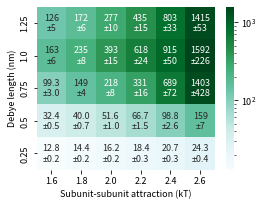

In [115]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

ax = plt.figure(figsize=(4, 3)).gca()
sns.heatmap(annot_mean[::-1], annot=annotations[::-1], fmt = '', cmap='BuGn', vmin=0, vmax=1500, norm=LogNorm())
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1])
plt.xlabel('Subunit-subunit attraction (kT)')
plt.ylabel('Debye length (nm)')
plt.savefig('paper_plots/disassembly_time/start_to_finish_time_heatmap.pdf')
plt.show()

In [26]:
annot_mean = np.mean(combined_disassembly_matrix[::-1], axis=-1)
annot_stds = np.std(structure_means[::-1], axis=-1) / np.mean(structure_means[::-1], axis=-1)
annot_uncertainties = annot_stds / np.sqrt(2 * len(batches) - 2)
annotations = np.empty((len(deb), len(att)), dtype=object)
for i in range(len(deb)):
    for j in range(len(att)):
        if annot_mean[i][j] > 4000:
            annotations[i][j] = "N/A"
        else:
            annotations[i][j] = "{:.2f}".format(annot_stds[i][j]) + "\n" + u"\u00B1" + "{:.2f}".format(annot_uncertainties[i][j])


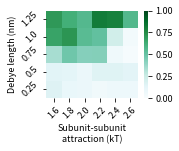

In [242]:
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(np.std(structure_means[::-1], axis=-1) / np.mean(structure_means[::-1], axis=-1), cmap='BuGn', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
#plt.savefig(basedir + '/plots/disassembly_heatmaps/structure_differences_heatmap.pdf')
plt.tight_layout()
plt.savefig('paper_plots/multi_nucleation/coefficient_of_variation_heatmap.pdf')
plt.show()

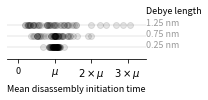

In [335]:
ax = plt.figure(figsize=(3, 1.5)).gca()
#ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_visible(False)
ax.set_xlim(-0.3, 3.5)
ax.xaxis.set_ticks([0, 1, 2, 3])
ax.xaxis.set_ticklabels(['0', r'$\mu$', r'$2 \times \mu$', r'$3 \times \mu$'])
ax.set_ylim(0, 4)
ax.yaxis.set_ticks([])
ax.axhline(1, c='#eeeeee')
ax.axhline(2, c='#eeeeee')
ax.axhline(3, c='#eeeeee')
for i in range(6):
    ax.scatter(structure_means[4][i] / np.mean(structure_means[4][i]), [3] * 9, c='k', alpha=0.1, zorder=999)
    ax.scatter(structure_means[2][i] / np.mean(structure_means[2][i]), [2] * 9, c='k', alpha=0.1, zorder=999)
    ax.scatter(structure_means[0][i] / np.mean(structure_means[0][i]), [1] * 9, c='k', alpha=0.1, zorder=999)
ax.text(3.5, 1, '0.25 nm', color=gray_ax)
ax.text(3.5, 2, '0.75 nm', color=gray_ax)
ax.text(3.5, 3, '1.25 nm', color=gray_ax)
ax.text(3.5, 4, 'Debye length')
ax.set_xlabel('Mean disassembly initiation time')
plt.tight_layout()
plt.savefig('paper_plots/multi_nucleation/disassembly_time_variation.pdf')

## Bond reinforcement analysis

In [11]:
from scipy.stats import mode
from collections import Counter

In [8]:
polymer_paths = np.loadtxt(basedir + batches[0] + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_10.txt')

In [19]:
def get_polymer_connections(polymer_path, window=10, threshold=0.7):
    connections = []
    for i in range(len(polymer_path) - 2 * window):
        segment1 = np.array(polymer_path[i:i+window])
        segment2 = np.array(polymer_path[i+window:i+2*window])
        mode1 = mode(segment1)
        mode2 = mode(segment2)
        if mode1.mode[0] != mode2.mode[0] and mode1.count[0] > window * threshold and mode2.count[0] > window * threshold:
            connections.append((mode1.mode[0], mode2.mode[0]))
            connections.append((mode2.mode[0], mode1.mode[0]))
    return list(set(connections))

def get_polymer_connections_multiplicity(polymer_path, window=10, threshold=0.7):
    connections = []
    mode1_former = 0
    mode2_former = 0
    for i in range(len(polymer_path) - 2 * window):
        segment1 = np.array(polymer_path[i:i+window])
        segment2 = np.array(polymer_path[i+window:i+2*window])
        mode1 = mode(segment1)
        mode2 = mode(segment2)
        if mode1.mode[0] != mode2.mode[0] and mode1.count[0] > window * threshold and mode2.count[0] > window * threshold:
            if mode1.mode[0] != mode1_former and mode2.mode[0] != mode2_former:
                connections.append((mode1.mode[0], mode2.mode[0]))
                connections.append((mode2.mode[0], mode1.mode[0]))
                mode1_former = mode1.mode[0]
                mode2_former = mode2.mode[0]
    return Counter(connections)

In [172]:
polymer_trajectory = []
for i in range(len(polymer_paths)):
    if i % 100 == 0:
        print(i)
    polymer_trajectory.append(get_polymer_connections(polymer_paths[i]))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [20]:
# Keeping track of multiple-reinforcements
polymer_trajectory = []
for i in range(len(polymer_paths)):
    if i % 100 == 0:
        print(i)
    polymer_trajectory.append(get_polymer_connections_multiplicity(polymer_paths[i]))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [38]:
bonds_trajectory = data[batches[0]]['pairs']['0.2']['2.2'][10]

In [33]:
def get_single_multiple_reinforcements(reinforcements_with_counts):
    single_reinforced_bonds = []
    multiple_reinforced_bonds = []
    for key in reinforcements_with_counts.keys():
        if reinforcements_with_counts[key] == 1:
            single_reinforced_bonds.append(key)
        else:
            multiple_reinforced_bonds.append(key)
    return single_reinforced_bonds, multiple_reinforced_bonds

In [34]:
def convert_pairs_to_tuples(pairs):
    tuples = []
    for pair in pairs:
        tuples.append((int(float(pair[0])), int(float(pair[1]))))
    return tuples

In [35]:
def count_reinforced_bonds(bond_pairs, reinforcement_pairs):
    count = 0
    for bond_pair in bond_pairs:
        if bond_pair in reinforcement_pairs:
            count += 1
    return count

In [176]:
# no multiplicity
unbroken_bonds = []
polymer_reinforcements = []
reinforced_unbroken_bonds = []
for i in range(len(bonds_trajectory)):
    unbroken_bonds.append(len(bonds_trajectory[i]))
    polymer_reinforcements.append(len(polymer_trajectory[i]) / 2)
    reinforced_unbroken_bonds.append(count_reinforced_bonds(convert_pairs_to_tuples(bonds_trajectory[i]), 
                                                            convert_pairs_to_tuples(polymer_trajectory[i])))

In [44]:
# yes multiplicity
unbroken_bonds = []
single_reinforcement_count = []
multiple_reinforcement_count = []
single_reinforced_unbroken_bonds = []
multiple_reinforced_unbroken_bonds = []
for i in range(len(bonds_trajectory)):
    unbroken_bonds.append(len(bonds_trajectory[i]))
    single_reinforcements, multiple_reinforcements = get_single_multiple_reinforcements(polymer_trajectory[i])
    single_reinforcement_count.append(len(single_reinforcements) / 2)
    multiple_reinforcement_count.append(len(multiple_reinforcements) / 2)
    single_reinforced_unbroken_bonds.append(count_reinforced_bonds(convert_pairs_to_tuples(bonds_trajectory[i]), 
                                                            convert_pairs_to_tuples(single_reinforcements)))
    multiple_reinforced_unbroken_bonds.append(count_reinforced_bonds(convert_pairs_to_tuples(bonds_trajectory[i]), 
                                                            convert_pairs_to_tuples(multiple_reinforcements)))

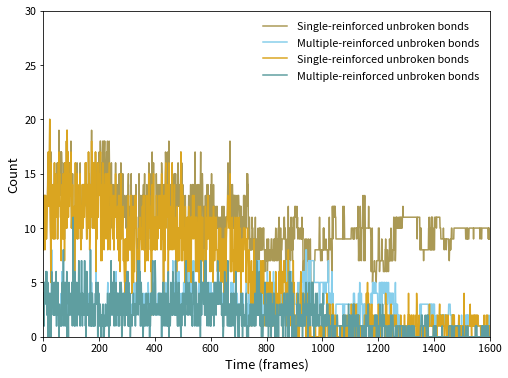

In [48]:
ax = plt.figure(figsize=(8, 6))
#plt.plot(unbroken_bonds[:1600], color='indianred', label='Unbroken bonds')
#plt.plot(polymer_reinforcements[:1600], color='cadetblue', label='Polymer reinforcements')
plt.plot(single_reinforcement_count[:1600], color='#aa9955', label='Single-reinforced unbroken bonds')
plt.plot(multiple_reinforcement_count[:1600], color='skyblue', label='Multiple-reinforced unbroken bonds')
plt.plot(single_reinforced_unbroken_bonds[:1600], color='goldenrod', label='Single-reinforced unbroken bonds')
plt.plot(multiple_reinforced_unbroken_bonds[:1600], color='cadetblue', label='Multiple-reinforced unbroken bonds')
#plt.plot(np.array(unbroken_bonds[:1600]) - np.array(reinforced_unbroken_bonds[:1600]), color='powderblue', label='Non-reinforced unbroken bonds')
plt.legend(frameon=False, fontsize='large')
plt.xlabel('Time (frames)', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlim(0, 1600)
plt.ylim(0, 30)
#plt.savefig(basedir + '/plots/polymer_reinforcement_individual.pdf')
plt.show()

In [50]:
# Average lifetime of multiple vs single reinforcements
all_polymer_trajectories = []
all_bond_trajectories = data[batches[1]]['pairs']['0.2']['2.2']

for i in range(repeats):
    print(i)
    polymer_paths = np.loadtxt(basedir + batches[1] + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_' + str(i) + '.txt')
    polymer_trajectory = []
    for j in range(len(polymer_paths)):
        polymer_trajectory.append(get_polymer_connections_multiplicity(polymer_paths[j]))
    all_polymer_trajectories.append(polymer_trajectory)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [51]:
unbroken_bonds = []
single_reinforcement_count = []
multiple_reinforcement_count = []
single_reinforced_unbroken_bonds = []
multiple_reinforced_unbroken_bonds = []
min_bonds_traj_length = len(all_bond_trajectories[0])

for i in range(len(all_polymer_trajectories)):
    print(i)
    unbroken_bonds.append([])
    single_reinforcement_count.append([])
    multiple_reinforcement_count.append([])
    single_reinforced_unbroken_bonds.append([])
    multiple_reinforced_unbroken_bonds.append([])
    if len(all_bond_trajectories[i]) < min_bonds_traj_length:
        min_bonds_traj_length = len(all_bond_trajectories[i])
    for j in range(len(all_bond_trajectories[i])):
        unbroken_bonds[i].append(len(all_bond_trajectories[i][j]))
        single_reinforcements, multiple_reinforcements = get_single_multiple_reinforcements(all_polymer_trajectories[i][j])
        single_reinforcement_count[i].append(len(single_reinforcements) / 2)
        multiple_reinforcement_count[i].append(len(multiple_reinforcements) / 2)
        single_reinforced_unbroken_bonds[i].append(count_reinforced_bonds(convert_pairs_to_tuples(all_bond_trajectories[i][j]), 
                                                            convert_pairs_to_tuples(single_reinforcements)))
        multiple_reinforced_unbroken_bonds[i].append(count_reinforced_bonds(convert_pairs_to_tuples(all_bond_trajectories[i][j]), 
                                                            convert_pairs_to_tuples(multiple_reinforcements)))
print(min_bonds_traj_length)
unbroken_bonds = [tr[:min_bonds_traj_length] for tr in unbroken_bonds]
single_reinforcement_count = [tr[:min_bonds_traj_length] for tr in single_reinforcement_count]
multiple_reinforcement_count = [tr[:min_bonds_traj_length] for tr in multiple_reinforcement_count]
single_reinforced_unbroken_bonds = [tr[:min_bonds_traj_length] for tr in single_reinforced_unbroken_bonds]
multiple_reinforced_unbroken_bonds = [tr[:min_bonds_traj_length] for tr in multiple_reinforced_unbroken_bonds]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1798


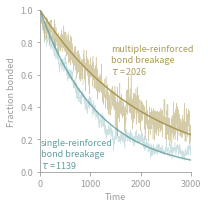

In [136]:
import scipy.optimize

def exponential_decay(t, tau):
    return np.exp(-1 * t / tau)

fraction_single_reinforced_bonded = np.mean(single_reinforced_unbroken_bonds, axis=0) / np.mean(single_reinforcement_count, axis=0)
fraction_multiple_reinforced_bonded = np.mean(multiple_reinforced_unbroken_bonds, axis=0) / np.mean(multiple_reinforcement_count, axis=0)


exponential_fit_single = scipy.optimize.curve_fit(exponential_decay, 
                                                #np.array(list(range(1, len(fraction_single_reinforced_bonded) + 1))),
                                                np.array(x_scale[0:len(fraction_single_reinforced_bonded)]),
                                                np.array(fraction_single_reinforced_bonded))
exponential_fit_multiple = scipy.optimize.curve_fit(exponential_decay, 
                                                #np.array(list(range(1, len(fraction_multiple_reinforced_bonded) + 1))),
                                                np.array(x_scale[0:len(fraction_multiple_reinforced_bonded)]),
                                                np.array(fraction_multiple_reinforced_bonded))
ax = plt.figure(figsize=(3, 3)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
plt.plot(np.array(x_scale[0:len(fraction_single_reinforced_bonded)]), fraction_single_reinforced_bonded, color='cadetblue', alpha=0.3, lw=0.5)
plt.plot(np.array(x_scale[0:len(fraction_multiple_reinforced_bonded)]), fraction_multiple_reinforced_bonded, color='#aa9955', alpha=0.5, lw=0.5)
plt.plot(np.array(x_scale[0:len(fraction_single_reinforced_bonded)]), exponential_decay(np.array(x_scale[0:len(fraction_single_reinforced_bonded)]), exponential_fit_single[0][0]), color='cadetblue', alpha=0.8, label='Fraction single-reinforced bonded')
plt.plot(np.array(x_scale[0:len(fraction_multiple_reinforced_bonded)]), exponential_decay(np.array(x_scale[0:len(fraction_single_reinforced_bonded)]), exponential_fit_multiple[0][0]), color='#aa9955', label='Fraction multiple-reinforced bonded')
plt.text(20, 0.02, "single-reinforced\nbond breakage\n" + r'$\tau$ = ' + str(int(np.round(exponential_fit_single[0][0]))), color='cadetblue')
plt.text(1400, 0.6, "multiple-reinforced\nbond breakage\n" + r'$\tau$ = ' + str(int(np.round(exponential_fit_multiple[0][0]))), color='#aa9955')
plt.xlabel('Time', color=gray_ax)
plt.ylabel('Fraction bonded', color=gray_ax)
plt.xlim(0, 3000)
plt.ylim(0, 1)
#plt.savefig(basedir + '/plots/polymer_reinforcement_norm_avg_fits_1.pdf')
plt.tight_layout()
plt.savefig('paper_plots/reinforcement_effect/single_vs_multiple_reinforced.pdf')
plt.show()

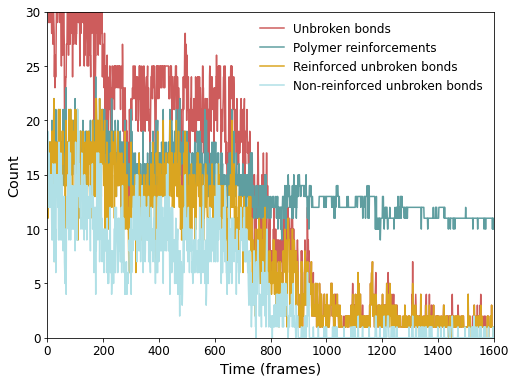

In [189]:
ax = plt.figure(figsize=(8, 6))
plt.plot(unbroken_bonds[:1600], color='indianred', label='Unbroken bonds')
plt.plot(polymer_reinforcements[:1600], color='cadetblue', label='Polymer reinforcements')
plt.plot(reinforced_unbroken_bonds[:1600], color='goldenrod', label='Reinforced unbroken bonds')
plt.plot(np.array(unbroken_bonds[:1600]) - np.array(reinforced_unbroken_bonds[:1600]), color='powderblue', label='Non-reinforced unbroken bonds')
plt.legend(frameon=False, fontsize='large')
plt.xlabel('Time (frames)', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlim(0, 1600)
plt.ylim(0, 30)
plt.savefig(basedir + '/plots/polymer_reinforcement_individual.pdf')
plt.show()

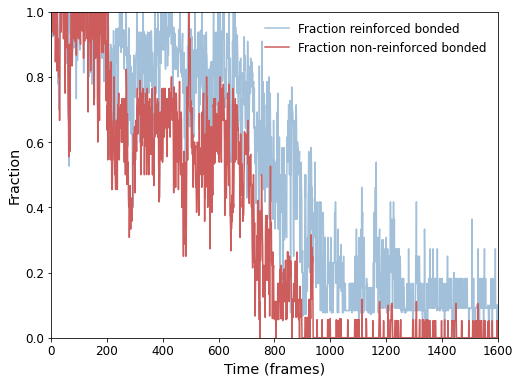

In [192]:
ax = plt.figure(figsize=(8, 6))
plt.plot(np.array(reinforced_unbroken_bonds[:1600]) / np.array(polymer_reinforcements[:1600]), color='steelblue', alpha=0.5, label='Fraction reinforced bonded')
plt.plot((np.array(unbroken_bonds[:1600]) - np.array(reinforced_unbroken_bonds[:1600])) / (30-np.array(polymer_reinforcements[:1600])), color='indianred', label='Fraction non-reinforced bonded')
plt.legend(frameon=False, fontsize='large')
plt.xlabel('Time (frames)', fontsize='x-large')
plt.ylabel('Fraction', fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlim(0, 1600)
plt.ylim(0, 1)
plt.savefig(basedir + '/plots/polymer_reinforcement_norm.pdf')
plt.show()

In [137]:
all_polymer_trajectories = []
all_bond_trajectories = data[batches[1]]['pairs']['0.2']['2.2']
for i in range(repeats):
    print(i)
    #polymer_paths = np.loadtxt(basedir + batches[0] + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % i)
    #polymer_trajectory = []
    #for i in range(len(polymer_paths)):
    #    polymer_trajectory.append(read_pairs(basedir + batches[0] + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % i))
    all_polymer_trajectories.append(read_pairs(basedir + batches[1] + '/analysis/raw/polymerconnections2_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [138]:
unbroken_bonds = []
polymer_reinforcements = []
reinforced_unbroken_bonds = []
min_bonds_traj_length = len(all_bond_trajectories[0])
for i in range(len(all_polymer_trajectories)):
    print(i)
    unbroken_bonds.append([])
    polymer_reinforcements.append([])
    reinforced_unbroken_bonds.append([])
    if len(all_bond_trajectories[i]) < min_bonds_traj_length:
        min_bonds_traj_length = len(all_bond_trajectories[i])
    for j in range(len(all_bond_trajectories[i])):
        unbroken_bonds[i].append(len(all_bond_trajectories[i][j]))
        polymer_reinforcements[i].append(len(all_polymer_trajectories[i][j]) / 2)
        reinforced_unbroken_bonds[i].append(count_reinforced_bonds(convert_pairs_to_tuples(all_bond_trajectories[i][j]), 
                                                                convert_pairs_to_tuples(all_polymer_trajectories[i][j])))
print(min_bonds_traj_length)
unbroken_bonds = [tr[:min_bonds_traj_length] for tr in unbroken_bonds]
polymer_reinforcements = [tr[:min_bonds_traj_length] for tr in polymer_reinforcements]
reinforced_unbroken_bonds = [tr[:min_bonds_traj_length] for tr in reinforced_unbroken_bonds]
non_reinforced_unbroken_bonds = np.mean(unbroken_bonds, axis=0) - np.mean(reinforced_unbroken_bonds, axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1798


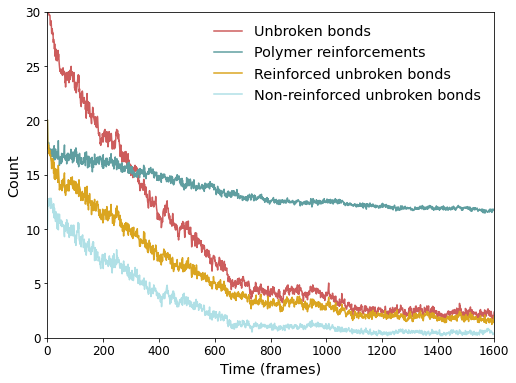

In [195]:
ax = plt.figure(figsize=(8, 6))
plt.plot(np.mean(unbroken_bonds, axis=0), color='indianred', label='Unbroken bonds')
plt.plot(np.mean(polymer_reinforcements, axis=0), color='cadetblue', label='Polymer reinforcements')
plt.plot(np.mean(reinforced_unbroken_bonds, axis=0), color='goldenrod', label='Reinforced unbroken bonds')
plt.plot(non_reinforced_unbroken_bonds, color='powderblue', label='Non-reinforced unbroken bonds')
plt.legend(frameon=False, fontsize='x-large')
plt.xlabel('Time (frames)', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlim(0, 1600)
plt.ylim(0, 30)
plt.savefig(basedir + '/plots/polymer_reinforcement_avg_1.pdf')
plt.show()

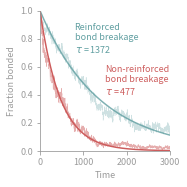

In [144]:
import scipy.optimize

def exponential_decay(t, tau):
    return np.exp(-1 * t / tau)

fraction_reinforced_bonded = np.mean(reinforced_unbroken_bonds, axis=0) / np.mean(polymer_reinforcements, axis=0)
fraction_non_reinforced_bonded = non_reinforced_unbroken_bonds / (30 - np.mean(polymer_reinforcements, axis=0))

exponential_fit_non = scipy.optimize.curve_fit(exponential_decay, 
                                                np.array(x_scale[0:len(fraction_non_reinforced_bonded)]),
                                                np.array(fraction_non_reinforced_bonded))
exponential_fit_rei = scipy.optimize.curve_fit(exponential_decay, 
                                                np.array(x_scale[0:len(fraction_reinforced_bonded)]),
                                                np.array(fraction_reinforced_bonded))
ax = plt.figure(figsize=(2.7, 2.7)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
plt.plot(x_scale[0:len(fraction_reinforced_bonded)], fraction_reinforced_bonded, color='cadetblue', alpha=0.3, lw=0.5)
plt.plot(x_scale[0:len(fraction_non_reinforced_bonded)], fraction_non_reinforced_bonded, color='indianred', alpha=0.5, lw=0.5)
plt.plot(x_scale[0:len(fraction_reinforced_bonded)], exponential_decay(np.array(x_scale[0:len(fraction_reinforced_bonded)]), exponential_fit_rei[0][0]), color='cadetblue', alpha=0.8, label='Fraction reinforced bonded')
plt.plot(x_scale[0:len(fraction_non_reinforced_bonded)], exponential_decay(np.array(x_scale[0:len(fraction_non_reinforced_bonded)]), exponential_fit_non[0][0]), color='indianred', label='Fraction non-reinforced bonded')
plt.text(800, 0.7, "Reinforced\nbond breakage\n" + r'$\tau$ = ' + str(int(np.round(exponential_fit_rei[0][0]))), color='cadetblue')
plt.text(1500, 0.4, "Non-reinforced\nbond breakage\n" + r'$\tau$ = ' + str(int(np.round(exponential_fit_non[0][0]))), color='indianred')
plt.xlabel('Time', color=gray_ax)
plt.ylabel('Fraction bonded', color=gray_ax)
plt.xlim(0, 3000)
plt.ylim(0, 1)
#plt.savefig(basedir + '/plots/polymer_reinforcement_norm_avg_fits_1.pdf')
plt.tight_layout()
plt.savefig('paper_plots/reinforcement_effect/reinforced_vs_non2.pdf')
plt.show()

In [145]:
import scipy.optimize

def exponential_decay(t, tau):
    return np.exp(-1 * t / tau)

# Bond breaking lines

anisotropic_batches = ['0_PS_off', '3_PS_off', '5_PS_off', '6_PS_off']
isotropic_batches = ['1_PS_off', '2_PS_off', '7_PS_off', '8_PS_off', '9_PS_off']

polymer_bond_effects_ani = np.zeros((len(deb), len(batches)))
polymer_bond_effects_iso = np.zeros((len(deb), len(batches)))
polymer_bond_stds_ani = np.zeros((len(deb), len(batches)))
polymer_bond_stds_iso = np.zeros((len(deb), len(batches)))

a = 2
for d in range(len(deb)):
    for b in range(len(batches)):
        batch = batches[b]
        print(batch)
        all_polymer_trajectories = []
        for i in range(repeats):
            all_polymer_trajectories.append(read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-%s_ATT-%s_PSS-10_%s.txt' % (deb[d], att[a], i)))
        print(deb[d], att[a])
        all_bond_trajectories = data[batch]['pairs'][deb[d]][att[a]]
        unbroken_bonds = []
        polymer_reinforcements = []
        reinforced_unbroken_bonds = []
        min_bonds_traj_length = len(all_bond_trajectories[0])
        for i in range(len(all_polymer_trajectories)):
            unbroken_bonds.append([])
            polymer_reinforcements.append([])
            reinforced_unbroken_bonds.append([])
            if len(all_bond_trajectories[i]) < min_bonds_traj_length:
                min_bonds_traj_length = len(all_bond_trajectories[i])
            for j in range(len(all_bond_trajectories[i])):
                unbroken_bonds[i].append(len(all_bond_trajectories[i][j]))
                polymer_reinforcements[i].append(len(all_polymer_trajectories[i][j]) / 2)
                reinforced_unbroken_bonds[i].append(count_reinforced_bonds(convert_pairs_to_tuples(all_bond_trajectories[i][j]), 
                                                                        convert_pairs_to_tuples(all_polymer_trajectories[i][j])))
        unbroken_bonds = [tr[:min_bonds_traj_length] for tr in unbroken_bonds]
        polymer_reinforcements = [tr[:min_bonds_traj_length] for tr in polymer_reinforcements]
        reinforced_unbroken_bonds = [tr[:min_bonds_traj_length] for tr in reinforced_unbroken_bonds]
        non_reinforced_unbroken_bonds = np.mean(unbroken_bonds, axis=0) - np.mean(reinforced_unbroken_bonds, axis=0)
        fraction_reinforced_bonded = np.mean(reinforced_unbroken_bonds, axis=0) / np.mean(polymer_reinforcements, axis=0)
        fraction_non_reinforced_bonded = non_reinforced_unbroken_bonds / (30 - np.mean(polymer_reinforcements, axis=0))
        exponential_fit_non = scipy.optimize.curve_fit(exponential_decay, 
                                                       np.array(list(range(1, len(fraction_non_reinforced_bonded) + 1))),
                                                       np.array(fraction_non_reinforced_bonded))
        exponential_fit_rei = scipy.optimize.curve_fit(exponential_decay, 
                                                       np.array(list(range(1, len(fraction_reinforced_bonded) + 1))),
                                                       np.array(fraction_reinforced_bonded))
        if batch in anisotropic_batches:
            polymer_bond_effects_ani[d][b] = exponential_fit_rei[0][0] / exponential_fit_non[0][0]
            polymer_bond_stds_ani[d][b] = exponential_fit_rei[0][0] / exponential_fit_non[0][0] * np.sqrt(exponential_fit_rei[1][0] / exponential_fit_rei[0][0]**2 + exponential_fit_non[1][0] / exponential_fit_non[0][0]**2)
        else:
            polymer_bond_effects_iso[d][b] = exponential_fit_rei[0][0] / exponential_fit_non[0][0]
            polymer_bond_stds_iso[d][b] = exponential_fit_rei[0][0] / exponential_fit_non[0][0] * np.sqrt(exponential_fit_rei[1][0] / exponential_fit_rei[0][0]**2 + exponential_fit_non[1][0] / exponential_fit_non[0][0]**2)
            

0_PS_off
0.05 2.0
1_PS_off
0.05 2.0
2_PS_off
0.05 2.0
3_PS_off
0.05 2.0
5_PS_off
0.05 2.0
6_PS_off
0.05 2.0
7_PS_off
0.05 2.0
8_PS_off
0.05 2.0
9_PS_off
0.05 2.0
0_PS_off
0.1 2.0
1_PS_off
0.1 2.0
2_PS_off
0.1 2.0
3_PS_off
0.1 2.0
5_PS_off
0.1 2.0
6_PS_off
0.1 2.0
7_PS_off
0.1 2.0
8_PS_off
0.1 2.0
9_PS_off
0.1 2.0
0_PS_off
0.15 2.0
1_PS_off
0.15 2.0
2_PS_off
0.15 2.0
3_PS_off
0.15 2.0
5_PS_off
0.15 2.0
6_PS_off
0.15 2.0
7_PS_off
0.15 2.0
8_PS_off
0.15 2.0
9_PS_off
0.15 2.0
0_PS_off
0.2 2.0
1_PS_off
0.2 2.0
2_PS_off
0.2 2.0
3_PS_off
0.2 2.0
5_PS_off
0.2 2.0
6_PS_off
0.2 2.0
7_PS_off
0.2 2.0
8_PS_off
0.2 2.0
9_PS_off
0.2 2.0
0_PS_off
0.25 2.0
1_PS_off
0.25 2.0
2_PS_off
0.25 2.0
3_PS_off
0.25 2.0
5_PS_off
0.25 2.0
6_PS_off
0.25 2.0
7_PS_off
0.25 2.0
8_PS_off
0.25 2.0
9_PS_off
0.25 2.0


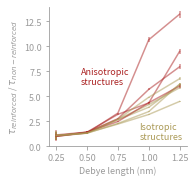

In [148]:
ax = plt.figure(figsize=(2.7, 2.7)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
for i in range(len(polymer_bond_effects_ani.T)):
    if np.sum(polymer_bond_effects_ani.T[i]) > 0:
        tau_ratios = polymer_bond_effects_ani.T[i]
        tau_ratio_err = polymer_bond_stds_ani.T[i]
        plt.errorbar(range(len(tau_ratios)), tau_ratios, yerr=tau_ratio_err, c='#AA2020', alpha=0.5)
    else:
        tau_ratios = polymer_bond_effects_iso.T[i]
        tau_ratio_err = polymer_bond_stds_iso.T[i]
        plt.errorbar(range(len(tau_ratios)), tau_ratios, yerr=tau_ratio_err, c='#AA9955', alpha=0.5)
plt.xlim(-0.25, 4.25)
plt.xticks([0, 1, 2, 3, 4], labels=['0.25', '0.50', '0.75', '1.00', '1.25'])
plt.xlabel('Debye length (nm)', color=gray_ax)
plt.ylim(0, 14)
plt.ylabel(r'$\tau_{reinforced}$ / $\tau_{non-reinforced}$', color=gray_ax)
plt.text(0.8, 6.2, 'Anisotropic\nstructures', color='#AA2020')
plt.text(2.7, 0.7, 'Isotropic\nstructures', color='#AA9955')
plt.tight_layout()
plt.savefig('paper_plots/reinforcement_effect/debye_dependence3.pdf')

In [486]:
def get_capsomer_connected_state(capsomer, polymer_connections, original_bonds):
    num_connections = np.sum(np.array(polymer_connections)[:,0] == capsomer)
    if num_connections == 0:
        return 1
    if num_connections == 1:
        return 2
    if num_connections == 4:
        return 7
    if num_connections == 5:
        return 8
    connected_neighbors = np.array(polymer_connections)[np.array(np.array(polymer_connections)[:,0]==capsomer).T][:, 1]
    if num_connections == 2:
        if ((int(connected_neighbors[0]), int(connected_neighbors[1])) in original_bonds or 
            (int(connected_neighbors[1]), int(connected_neighbors[0])) in original_bonds):
            return 3
        else:
            return 4
    for i in range(3):
        if ((int(connected_neighbors[i]), int(connected_neighbors[i-1])) not in original_bonds and 
            (int(connected_neighbors[i-1]), int(connected_neighbors[i])) not in original_bonds and 
            (int(connected_neighbors[i]), int(connected_neighbors[i-2])) not in original_bonds and
            (int(connected_neighbors[i-2]), int(connected_neighbors[i])) not in original_bonds):
            return 6
    return 5

In [188]:
capsomer_states = []
for i in range(repeats):
    print(i)
    # Identify original bonds
    original_pairs = convert_pairs_to_tuples(data[batches[0]]['pairs']['0.2']['2.2'][i][0])
    capsomers = list(set(np.array(original_pairs).flatten()))
    bond_count = data[batches[0]]['bonds']['0.2']['2.2'][i]
    # Get polymer path / connections
    polymer_paths = np.loadtxt(basedir + batches[0] + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % str(i))
    polymer_trajectory = []
    for j in range(len(polymer_paths)):
        polymer_trajectory.append(get_polymer_connections(polymer_paths[j]))
    disassembly_index = len(bond_count) - list(reversed(bond_count)).index(30.) -  1
    capsomer_states.append([])
    for j in range(min(disassembly_index + 10, len(bond_count))):
        capsomer_states[-1].append([])
        # Identify polymer connections
        polymer_connections = polymer_trajectory[j]
        # Identify connected state for each capsomer
        for capsomer in capsomers:
            capsomer_states[-1][-1].append(get_capsomer_connected_state(capsomer, polymer_connections, original_pairs))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [29]:
for batch in batches:
    # Get capsomer states in the starting structure
    capsomer_states = []
    number_connections = []
    # Identify original bonds
    original_pairs = convert_pairs_to_tuples(data[batch]['pairs']['0.2']['2.2'][i][0])
    capsomers = list(set(np.array(original_pairs).flatten()))
    # Get polymer path / connections
    polymer_path = np.loadtxt(basedir + batch + '/analysis/raw/polymerpath_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % str(i))[0]
    polymer_connections = get_polymer_connections(polymer_path)
    for capsomer in capsomers:
        state = get_capsomer_connected_state(capsomer, polymer_connections, original_pairs)
        capsomer_states.append(state)
        if state == 1:
            number_connections.append(0)
        if state == 2:
            number_connections.append(1)
        if state == 3 or state == 4:
            number_connections.append(2)
        if state == 5 or state == 6:
            number_connections.append(3)
        if state == 7:
            number_connections.append(4)
        if state == 8:
            number_connections.append(5)

    ax = plt.figure(figsize=(8, 6)).gca()
    sns.countplot(capsomer_states, order=[1, 2, 3, 4, 5, 6, 7, 8], color="indianred")
    plt.xlabel("Capsomer connected state", fontsize='x-large')
    plt.ylabel("Count", fontsize='x-large')
    plt.title(batch, fontsize='x-large')
    plt.savefig(basedir + '/plots/initial_capsomer_states' + batch + '.pdf')
    plt.close()

    ax = plt.figure(figsize=(6, 6)).gca()
    sns.countplot(number_connections, order=[0, 1, 2, 3, 4, 5], color="indianred")
    plt.xlabel("Number of polymer reinforcements", fontsize='x-large')
    plt.ylabel("Count", fontsize='x-large')
    plt.ylim(0, 7)
    plt.title(batch + '\nmean: ' + str(np.mean(number_connections)) + '\nstd: ' + str(np.std(number_connections)), fontsize='x-large')
    plt.savefig(basedir + '/plots/initial_reinforcement_counts' + batch + '.pdf')
    plt.close()

/Users/amelia/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/amelia/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/amelia/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/

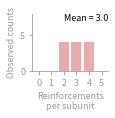

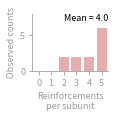

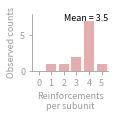

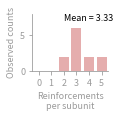

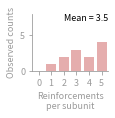

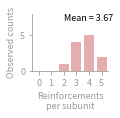

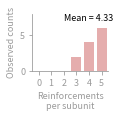

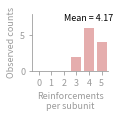

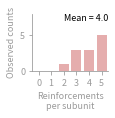

In [867]:
for batch in batches:
    init_pairs = read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-0.2_ATT-2.0_PSS-10_0.txt')[0]
    subunits, reinforcement_counts = np.unique(flatten(init_pairs), return_counts=True)
    vals, dist = np.unique(flatten(reinforcement_counts/2), return_counts=True)
    plt.figure(figsize=(1.7, 1.7))
    ax = plt.gca()
    gray_ax = '#999999'
    ax.tick_params(color=gray_ax, labelcolor=gray_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(gray_ax)
    ax.spines['left'].set_color(gray_ax)
    plt.bar(vals, dist, width=0.8, align='center', label='observed', color='indianred', alpha=0.5)
    plt.xticks(range(0, 6))
    plt.xlabel('Reinforcements\nper subunit', color=gray_ax)
    plt.xlim(-0.5, 5.5)
    plt.ylim(0, 8)
    plt.ylabel('Observed counts', color=gray_ax)
    plt.text(2, 7, 'Mean = %s' % (str(np.round(np.average(vals, weights=dist), decimals=2))))
    plt.tight_layout()
    plt.savefig('paper_plots/anisotropy/extras/weak_reinforcements_' + batch + '.pdf')

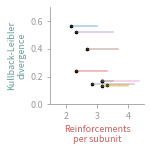

In [866]:
# Plot KL divergence/entropy vs mean reinforcements per capsomer
entropies = [1.92, 2.34, 2.32, 2.25, 1.96, 2.08, 2.31, 2.34, 2.35]
divergences = [0.56, 0.14, 0.17, 0.24, 0.52, 0.40, 0.17, 0.15, 0.13]
reinforcements = [2.166, 3.333, 3.166, 2.333, 2.333, 2.666, 3.166, 2.833, 3.166]
weak_reinforcements = [3, 4, 3.5, 3.333, 3.5, 3.667, 4.333, 4.167, 4]
#reinforcements = [1.67, 2.67, 1.67, 2.33, 2.73, 1.82, 1.67, 1.8, 2.17]
ax = plt.figure(figsize=(2.2, 2.2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
plt.scatter(reinforcements, divergences, s=7, c='k')
for i in range(len(divergences)):
    plt.plot([reinforcements[i], weak_reinforcements[i]], [divergences[i], divergences[i]], alpha=0.4)
plt.xlim(1.5, 4.5)
plt.ylim(0, 0.7)
#plt.xticks([2, 2.5, 3, 3.5])
#plt.yticks([0, 0.2, 0.4, 0.6])
plt.xlabel('Reinforcements\nper subunit', color='indianred')
plt.ylabel('Kullback-Leibler\ndivergence', color='cadetblue')
plt.tight_layout()
plt.savefig('paper_plots/anisotropy/anisotropy_scatter3.pdf')
plt.show()

In [488]:
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

In [770]:
def get_mean_reinforcements(capsomer_states):
    reinforcements = []
    for state in capsomer_states:
        if state == 1:
            reinforcements.append(0)
        if state == 2:
            reinforcements.append(1)
        if state == 3 or state == 4:
            reinforcements.append(2)
        if state == 5 or state == 6:
            reinforcements.append(3)
        if state == 7:
            reinforcements.append(4)
        if state == 8:
            reinforcements.append(5)
    return np.mean(reinforcements)

for d in ['0.2']:#deb:
    for a in ['2.4']:#att:
        print(d, a)
        for p in pss:
            capsomer_states = []
            all_reinforcements = []
            for batch in batches:
                for i in range(repeats):
                    capsomer_states.append(list(np.loadtxt(basedir + batch + '/analysis/raw/capsomerstates2_DEB-%s_ATT-%s_PSS-%s_%s.txt' % (d, a, p, str(i)))))
                    for frame in capsomer_states[-1]:
                        all_reinforcements.append(get_mean_reinforcements(frame))
            pre_reinforcements = []
            for c in capsomer_states:
                if len(c) < 2000:
                    pre_reinforcements.append(get_mean_reinforcements(c[-10]))

0.2 2.4


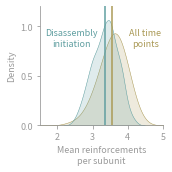

In [825]:
ax = plt.figure(figsize=(2.5, 2.5)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
sns.kdeplot(data=all_reinforcements, bw_method=0.3, fill=True, color='#AA9955', lw=0.5, alpha=0.2)
plt.axvline(np.mean(all_reinforcements), color='#AA9955')
sns.kdeplot(data=pre_reinforcements, bw_method=0.3, fill=True, color='cadetblue', lw=0.5, alpha=0.2)
plt.axvline(np.mean(pre_reinforcements), color='cadetblue')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.yticks([0, 0.5, 1])
plt.xlabel('Mean reinforcements\nper subunit', color=gray_ax)
plt.ylabel('Density', color=gray_ax)
plt.text(4.5, 0.8, 'All time\npoints', color='#AA9955', ha='center')
plt.text(2.4, 0.8, 'Disassembly\ninitiation', color='cadetblue', ha='center')
plt.ylim(0, 1.2)
plt.xlim(1.5, 5)
plt.tight_layout()
plt.savefig('paper_plots/shift/shift_means2.pdf')

## Shift in average reinforcements

In [487]:
def get_bonds_per_subunit(states):
    states = np.array(states)
    num_1 = np.count_nonzero(states == 2.0)
    num_2 = np.count_nonzero(states == 3.0) + np.count_nonzero(states == 4.0)
    num_3 = np.count_nonzero(states == 5.0) + np.count_nonzero(states == 6.0)
    num_4 = np.count_nonzero(states == 7.0)
    num_5 = np.count_nonzero(states == 8.0)
    total_bonds = 1 * num_1 + 2 * num_2 + 3 * num_3 + 4 * num_4 + 5 * num_5
    return total_bonds / len(states)

def convert_states_to_bonds(states):
    bonds = np.zeros(len(states)).tolist()
    for i in range(len(bonds)):
        if states[i] == 1:
            bonds[i] = 0
        elif states[i] == 2:
            bonds[i] = 1
        elif states[i] == 3 or states[i] == 4:
            bonds[i] = 2
        elif states[i] == 5 or states[i] == 6:
            bonds[i] = 3
        elif states[i] == 7:
            bonds[i] = 4
        else:
            bonds[i] = 5
    return bonds

In [801]:
shifts = np.zeros((len(deb), len(att)))
dis_counts = np.zeros((len(deb), len(att)))

for d in range(len(deb)):
    for a in range(len(att)):
        print(deb[d], att[a])
        all_polymer_trajectories = []
        all_bond_trajectories = []
        for batch in batches:
            for i in range(repeats):
                all_polymer_trajectories.append(read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-%s_ATT-%s_PSS-10_%s.txt' % (deb[d], att[a], i)))
        polymer_reinforcements = []
        for i in range(len(all_polymer_trajectories)):
            polymer_reinforcements.append([])
            for j in range(len(all_polymer_trajectories[i])):
                polymer_reinforcements[i].append(len(all_polymer_trajectories[i][j]) / 2)
        
        bond_trajectories = []
        for batch in batches:
            for i in range(repeats):
                bond_trajectories.append(data[batch]['bonds'][deb[d]][att[a]][i])
        disassembly_indices = [len(b) - list(reversed(b)).index(30.) -  1 for b in bond_trajectories]
        
        pre_disassembly_reinforcements = []
        disassembly_reinforcements = []
        for i in range(len(disassembly_indices)):
            index = disassembly_indices[i]
            if index > 1 and index < 2400:
                pre_disassembly_reinforcements.append(np.mean(polymer_reinforcements[i][:index]))
                disassembly_reinforcements.append(polymer_reinforcements[i][index])
        shifts[d][a] =  np.mean(disassembly_reinforcements) - np.mean(pre_disassembly_reinforcements)
        dis_counts[d][a] = len(disassembly_reinforcements)

0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.2 2.4
0.2 2.6
0.25 1.6
0.25 1.8
0.25 2.0
0.25 2.2
0.25 2.4
0.25 2.6


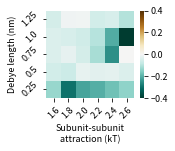

In [805]:
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(shifts[::-1]/6 * (dis_counts>10), cmap='BrBG_r', vmin=-.4, vmax=0.4)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/shift/shift_heatmap2.pdf')
plt.show()

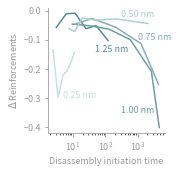

In [824]:
ax = plt.figure(figsize=(2.5, 2.5)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
initiation_times = np.mean(combined_disassembly_matrix[::-1], axis=-1)
shift_means = shifts[::-1]/6
deb_colors = ['#5f9ea0', '#7baeaf', '#95bebf', '#b0cece', '#cadede']
deb_colors = ['#4f8e90', '#6b9e9f', '#85aeaf', '#b0cece', '#cadede']
for i in range(len(initiation_times)):
    if i == 2:
        plt.plot(initiation_times[i][:-1], shift_means[i][:-1], color=deb_colors[i])
    else:
        plt.plot(initiation_times[i], shift_means[i], color=deb_colors[i])
plt.semilogx()
plt.xlabel('Disassembly initiation time', color=gray_ax)
plt.ylabel(r'$\Delta$ Reinforcements', color=gray_ax)
plt.text(50, -0.14, '1.25 nm', color=deb_colors[0])
plt.text(300, -0.35, '1.00 nm', color=deb_colors[1])
plt.text(1000, -0.1, '0.75 nm', color=deb_colors[2])
plt.text(300, -0.02, '0.50 nm', color=deb_colors[3])
plt.text(5, -0.3, '0.25 nm', color=deb_colors[4])
plt.tight_layout()
plt.savefig('paper_plots/shift/shift_scatter2.pdf')

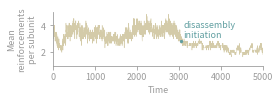

In [154]:
batch = '0_PS_off'
rep = 6
polymer_traj = read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-0.2_ATT-2.4_PSS-10_' + str(rep) + '.txt')
bonds_traj = data[batch]['bonds']['0.2']['2.4'][rep]
disassembly_index = len(bonds_traj) - list(reversed(bonds_traj)).index(30.) -  1
reinforcement_per_sub = []
for i in range(len(polymer_traj)):
    reinforcement_per_sub.append(len(polymer_traj[i]) / 12)
ax = plt.figure(figsize=(4, 1.5)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
plt.plot(x_scale, reinforcement_per_sub, color='#aa9955', lw=0.5, alpha=0.5, zorder=0)
plt.scatter(x_scale[disassembly_index], reinforcement_per_sub[disassembly_index], color='cadetblue', zorder=1, s=5)
plt.text(3100, 3.1, 'disassembly\ninitiation', color='cadetblue')
plt.xlim(0, 5000)
plt.ylim(1, 5)
plt.xlabel('Time', color=gray_ax)
plt.ylabel('Mean\nreinforcements\nper subunit', color=gray_ax)
plt.tight_layout()
plt.savefig('paper_plots/shift/reinforcement_fluctuation.pdf')

## Critical nucleus analysis

In [757]:
all_polymer_trajectories = []
all_bond_trajectories = []
for batch in batches:
    print(batch)
    for i in range(repeats):
        all_polymer_trajectories.append(read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-0.2_ATT-2.2_PSS-10_%s.txt' % i))
polymer_reinforcements = []
for i in range(len(all_polymer_trajectories)):
    polymer_reinforcements.append([])
    for j in range(len(all_polymer_trajectories[i])):
        polymer_reinforcements[i].append(len(all_polymer_trajectories[i][j]) / 2)

0_PS_off
1_PS_off
2_PS_off
3_PS_off
5_PS_off
6_PS_off
7_PS_off
8_PS_off
9_PS_off


In [758]:
bond_trajectories = []
for batch in batches:
    for i in range(repeats):
        bond_trajectories.append(data[batch]['bonds']['0.2']['2.2'][i])

In [759]:
disassembly_indices = [len(b) - list(reversed(b)).index(30.) -  1 for b in bond_trajectories]

In [760]:
pre_disassembly_reinforcements = []
post_disassembly_reinforcements = []
pre_disassembly_bonds = []
post_disassembly_bonds = []

for i in range(len(disassembly_indices)):
    index = disassembly_indices[i]
    pre_disassembly_reinforcements.extend(polymer_reinforcements[i][:index])
    post_disassembly_reinforcements.extend(polymer_reinforcements[i][index:])
    pre_disassembly_bonds.extend(bond_trajectories[i][:index])
    post_disassembly_bonds.extend(bond_trajectories[i][index:])

In [743]:
bond_x_scale = []
bond_fracs = []
for b in range(0, 31):
    if b in pre_disassembly_bonds or b in post_disassembly_bonds:
        bond_x_scale.append(b)
        pre_count = pre_disassembly_bonds.count(b)
        post_count = post_disassembly_bonds.count(b)
        bond_fracs.append(pre_count / (pre_count + post_count))

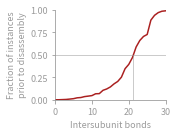

In [763]:
ax = plt.figure(figsize=(2.5, 2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)

plt.plot(bond_x_scale, bond_fracs, color='#AA2020')
plt.axhline(0.5, lw=0.5, color=gray_ax)

critical_index = np.argmax(np.array(bond_fracs) > 0.5) - 1
fractional_crit = (0.5 - bond_fracs[critical_index]) / (bond_fracs[critical_index+1] - bond_fracs[critical_index])
plt.axvline(bond_x_scale[critical_index] + fractional_crit, lw=0.5, color=gray_ax, ymax=0.5)

plt.xlim(min(bond_x_scale), max(bond_x_scale))
plt.xlabel('Intersubunit bonds', color=gray_ax)
plt.ylim(0, 1)
plt.ylabel('Fraction of instances\nprior to disassembly', c=gray_ax)
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/bond_frac_trace.pdf')

In [761]:
reinf_x_scale = []
reinf_fracs = []
for r in range(0, 31):
    if r in pre_disassembly_reinforcements or r in post_disassembly_reinforcements:
        pre_count = pre_disassembly_reinforcements.count(r)
        post_count = post_disassembly_reinforcements.count(r)
        if pre_count + post_count >= 10:
            reinf_x_scale.append(r)
            reinf_fracs.append(pre_count / (pre_count + post_count))

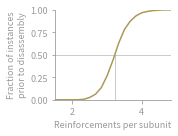

In [764]:
ax = plt.figure(figsize=(2.5, 2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
ax.plot(np.array(reinf_x_scale)/6, reinf_fracs, color='#AA9955')
plt.axhline(0.5, lw=0.5, color=gray_ax)

critical_index = np.argmax(np.array(reinf_fracs) > 0.5) - 1
fractional_crit = (0.5 - reinf_fracs[critical_index]) / (reinf_fracs[critical_index+1] - reinf_fracs[critical_index])
plt.axvline((reinf_x_scale[critical_index] + fractional_crit) / 6, lw=0.5, color=gray_ax, ymax=0.5)

plt.xlim(min(reinf_x_scale)/6, max(reinf_x_scale)/6)
plt.xlabel('Reinforcements per subunit', color=gray_ax)
plt.ylim(0, 1)
plt.ylabel('Fraction of instances\nprior to disassembly', c=gray_ax)
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/reinforcement_frac_trace.pdf')

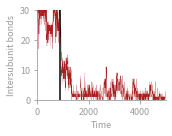

In [716]:
ax = plt.figure(figsize=(2.5, 2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)

plt.plot(x_scale, bond_trajectories[112], color='#AA2020', lw=0.2)
plt.axvline(x_scale[disassembly_indices[112]], c='k')
plt.xlim(min(x_scale), max(x_scale))
plt.xlabel('Time', color=gray_ax)
plt.ylim(0, 30)
plt.ylabel('Intersubunit bonds', c=gray_ax)
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/sample_bond_trace.pdf')

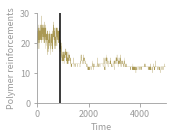

In [766]:
ax = plt.figure(figsize=(2.5, 2)).gca()
gray_ax = '#999999'
ax.tick_params(color=gray_ax, labelcolor=gray_ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(gray_ax)
ax.spines['left'].set_color(gray_ax)
ax.plot(x_scale, polymer_reinforcements[112], color='#AA9955', lw=0.2)
plt.axvline(x_scale[disassembly_indices[112]], c='k')

plt.xlim(min(x_scale), max(x_scale))
plt.xlabel('Time', color=gray_ax)
plt.ylim(0, 30)
plt.ylabel('Polymer reinforcements', c=gray_ax)
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/sample_reinforcement_trace.pdf')

In [777]:
critical_bonds = np.zeros((len(deb), len(att)))
critical_reinforcements = np.zeros((len(deb), len(att)))
reinforcement_lower_limits = np.zeros((len(deb), len(att)))
reinforcement_upper_limits = np.zeros((len(deb), len(att)))

for d in range(len(deb)):
    for a in range(len(att)):
        print(deb[d], att[a])
        all_polymer_trajectories = []
        all_bond_trajectories = []
        for batch in batches:
            for i in range(repeats):
                all_polymer_trajectories.append(read_pairs(basedir + batch + '/analysis/raw/polymerconnections2_DEB-%s_ATT-%s_PSS-10_%s.txt' % (deb[d], att[a], i)))
        polymer_reinforcements = []
        for i in range(len(all_polymer_trajectories)):
            polymer_reinforcements.append([])
            for j in range(len(all_polymer_trajectories[i])):
                polymer_reinforcements[i].append(len(all_polymer_trajectories[i][j]) / 2)
        
        bond_trajectories = []
        for batch in batches:
            for i in range(repeats):
                bond_trajectories.append(data[batch]['bonds'][deb[d]][att[a]][i])
        disassembly_indices = [len(b) - list(reversed(b)).index(30.) -  1 for b in bond_trajectories]
        
        pre_disassembly_reinforcements = []
        post_disassembly_reinforcements = []
        pre_disassembly_bonds = []
        post_disassembly_bonds = []
        for i in range(len(disassembly_indices)):
            index = disassembly_indices[i]
            pre_disassembly_reinforcements.extend(polymer_reinforcements[i][:index])
            post_disassembly_reinforcements.extend(polymer_reinforcements[i][index:])
            pre_disassembly_bonds.extend(bond_trajectories[i][:index])
            post_disassembly_bonds.extend(bond_trajectories[i][index:])
            
        bond_x_scale = []
        bond_fracs = []
        for b in range(0, 31):
            if b in pre_disassembly_bonds or b in post_disassembly_bonds:
                pre_count = pre_disassembly_bonds.count(b)
                post_count = post_disassembly_bonds.count(b)
                bond_x_scale.append(b)
                bond_fracs.append(pre_count / (pre_count + post_count))
        reinf_x_scale = []
        reinf_fracs = []
        for r in range(0, 31):
            if r in pre_disassembly_reinforcements or r in post_disassembly_reinforcements:
                pre_count = pre_disassembly_reinforcements.count(r)
                post_count = post_disassembly_reinforcements.count(r)
                if pre_count + post_count >= 10:
                    reinf_x_scale.append(r)
                    reinf_fracs.append(pre_count / (pre_count + post_count))
                
        ax = plt.figure(figsize=(2.5, 2)).gca()
        gray_ax = '#999999'
        ax.tick_params(color=gray_ax, labelcolor=gray_ax)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color(gray_ax)
        ax.spines['left'].set_color(gray_ax)

        plt.plot(bond_x_scale, bond_fracs, color='#AA2020')
        plt.axhline(0.5, lw=0.5, color=gray_ax)

        if True in (np.array(bond_fracs) > 0.5) and bond_fracs[0] < 0.5:
            critical_index = np.argmax(np.array(bond_fracs) > 0.5) - 1
            fractional_crit = (0.5 - bond_fracs[critical_index]) / (bond_fracs[critical_index+1] - bond_fracs[critical_index])
            plt.axvline(bond_x_scale[critical_index] + fractional_crit, lw=0.5, color=gray_ax, ymax=0.5)
            critical_bonds[d][a] = bond_x_scale[critical_index] + fractional_crit
        elif bond_fracs[-1] < 0.5:
            critical_bonds[d][a] = bond_x_scale[-1]
        else:
            critical_bonds[d][a] = bond_x_scale[0]

        plt.xlim(min(bond_x_scale), max(bond_x_scale))
        plt.xlabel('Intersubunit bonds', color=gray_ax)
        plt.ylim(0, 1)
        plt.ylabel('Fraction of instances\nprior to disassembly', c=gray_ax)
        plt.tight_layout()
        plt.savefig('paper_plots/critical_nucleus/extras/bond_frac_trace_DEB-%s_ATT-%s.pdf' % (deb[d], att[a]))
        plt.close()
        
        ax = plt.figure(figsize=(2.5, 2)).gca()
        gray_ax = '#999999'
        ax.tick_params(color=gray_ax, labelcolor=gray_ax)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color(gray_ax)
        ax.spines['left'].set_color(gray_ax)
        ax.plot(np.array(reinf_x_scale)/6, reinf_fracs, color='#AA9955')
        plt.axhline(0.5, lw=0.5, color=gray_ax)

        if True in (np.array(reinf_fracs) > 0.5) and reinf_fracs[0] < 0.5:
            critical_index = np.argmax(np.array(reinf_fracs) > 0.5) - 1
            fractional_crit = (0.5 - reinf_fracs[critical_index]) / (reinf_fracs[critical_index+1] - reinf_fracs[critical_index])
            plt.axvline((reinf_x_scale[critical_index] + fractional_crit)/6, lw=0.5, color=gray_ax, ymax=0.5)
            critical_reinforcements[d][a] = reinf_x_scale[critical_index] + fractional_crit
        elif reinf_fracs[-1] < 0.5:
            critical_reinforcements[d][a] = reinf_x_scale[-1]
            reinforcement_lower_limits[d][a] = 1
        else:
            critical_reinforcements[d][a] = reinf_x_scale[0]
            reinforcement_upper_limits[d][a] = 1

        plt.xlim(min(reinf_x_scale)/6, max(reinf_x_scale)/6)
        plt.xlabel('Reinforcements per subunit', color=gray_ax)
        plt.ylim(0, 1)
        plt.ylabel('Fraction of instances\nprior to disassembly', c=gray_ax)
        plt.tight_layout()
        plt.savefig('paper_plots/critical_nucleus/extras/reinforcement_frac_trace_DEB-%s_ATT-%s.pdf' % (deb[d], att[a]))
        plt.close()

np.savetxt('critical_bonds.txt', critical_bonds)
np.savetxt('critical_reinforcements.txt', critical_reinforcements)
np.savetxt('reinforcement_upper_limits.txt', reinforcement_upper_limits)
np.savetxt('reinforcement_lower_limits.txt', reinforcement_lower_limits)

0.05 1.6
0.05 1.8
0.05 2.0
0.05 2.2
0.05 2.4
0.05 2.6
0.1 1.6
0.1 1.8
0.1 2.0
0.1 2.2
0.1 2.4
0.1 2.6
0.15 1.6
0.15 1.8
0.15 2.0
0.15 2.2
0.15 2.4
0.15 2.6
0.2 1.6
0.2 1.8
0.2 2.0
0.2 2.2
0.2 2.4
0.2 2.6
0.25 1.6
0.25 1.8
0.25 2.0
0.25 2.2
0.25 2.4
0.25 2.6


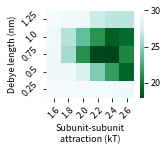

In [786]:
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(critical_bonds[::-1], cmap='BuGn_r', vmax=30)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/critical_bonds.pdf')
plt.show()

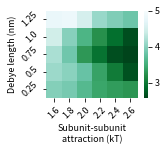

In [787]:
ax = plt.figure(figsize=(2.5, 2.2)).gca()
sns.heatmap(critical_reinforcements[::-1]/6, cmap='BuGn_r', vmax=5)
plt.xticks(ticks=np.arange(0.5, len(att)+0.5, 1), labels=att, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(deb)+0.5, 1), labels=list(map(str, 5 * np.array(list(map(float, deb)))))[::-1], rotation=45)
plt.xlabel('Subunit-subunit\nattraction (kT)')
plt.ylabel('Debye length (nm)')
plt.tight_layout()
plt.savefig('paper_plots/critical_nucleus/critical_reinforcements.pdf')
plt.show()